### Naive Bayes introduction

* Naive: Events are independent of each other
    * because they make a simplifying assumption of conditional independence of each pair of the X features, given the y variable (meaning P(xi|y,x1...xn) is equivalent to P(xi|y)) （not always correct)
* As a classifier, it assumes the independence of features
    * Should perform better after removing colinera columns (remove features that are colinear)
    * the result - Percentage is the likelihood that a sample belongs to a class based on priors

### Bayes's theorem:
![image](images/bayestheorem.png)

**Prior probability: P(A)** - or initial degree of belief that event A will happen <br>
After accounting for event B occuring, this initial belief gets updated, is represented by <br>
**Posterial probability: P(A|B)**

An example to understand the bayes theorem:
Let's take a look at an example—say we are building a spam filter, and we find that 10% of emails are spam. This 10% is our prior, or P(spam). We want to know the probability an email we just received is spam given that it contains the word free—we want to find P(spam|free). In order to find this, we need the probability that the word free is in an email given that it is spam, or P(free|spam), and the probability of the word free being in an email.

Let's say we learned that 12% of emails contained the word free and 20% of the emails that were determined to be spam contained the word free. Plugging all this into the equation from before, we see that once we know an email contains the word free, our belief of whether or not it is spam increases from 10% to 16.7%, which is our posterior probability:

![image](images/example-bayes.png)

With multiple features - for multinomial naive bayes
![image](images/multiplefeatures.png)

Application
* Used for text classification - catching spam
* In sklearn there are three classes:
    - GaussianNB
        * Assumes a Gaussian distritbuion, continuous features with a normal distribution
        * Need to transform data to convert to normal distribution
        * characterized by the mean and variance
    - MultinomialNB
        * Discrete occurence counts
        * Used whenever a feature must be represneted a whole number
    - BermoulliNB
        * Discrete Boolean features
        * Useful when a feature can be present or absent
        
[Scikit-learn introduction about these three methods](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes)


Advantages:
* Can train a model with a small number of samples
   
* Serves as a good baseline model
    * because we don't have to tune any hyperparameters, and it is quick to train.
* Best applied to problems in which information from a very high number of attributes should be considered simultaneously to estimate the probability of final outcome. 

Disadvantages:
* Can't capture the interactions between features
* These models are susceptible to the zero probability problem. If you try to classify a new sample that has no training data, it will have a zero probability.
    * One solution is to use Laplace smoothing. Sklearn controls this with the alpha parameter, which defaults to 1 and enables smoothing on the MultinomialNB and BernoulliNB models.

### Implementation - MultinomialNB

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_messages = pd.read_csv('data/spam.csv', encoding='latin-1',\
                         sep=',', names=['labels', 'message'])

In [5]:
df_messages.head(3)

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [6]:
df_messages.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
df_messages.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [13]:
# calculate the word count and the character count for each message
df_messages['word_count'] = df_messages['message'].apply(lambda x: len(str(x).split(" ")))
df_messages['character_count'] = df_messages['message'].str.len()
df_messages[['message', 'word_count', 'character_count']].head()

,message,word_count,character_count
0,"Go until jurong point, crazy.. Available only ...",20,111
1,Ok lar... Joking wif u oni...,6,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,28,155
3,U dun say so early hor... U c already then say...,11,49
4,"Nah I don't think he goes to usf, he lives aro...",13,61


        message
labels         
ham        4825
spam        747
  labels  message
0    ham     4825
1   spam      747


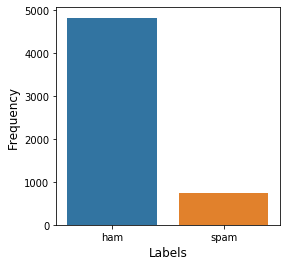

In [24]:
labels_count = pd.DataFrame(df_messages.groupby('labels')['message'].count())
print(labels_count)
labels_count.reset_index(inplace=True)
print(labels_count)

plt.figure(figsize=(4, 4))
sns.barplot(labels_count['labels'], labels_count['message'])
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Labels', fontsize=12)
plt.show()

In [26]:
class_labels = {'ham':0, 'spam':1}
df_messages['labels'] = df_messages['labels'].map(class_labels)
df_messages.head()

,labels,message,word_count,character_count
0,0,"Go until jurong point, crazy.. Available only ...",20,111
1,0,Ok lar... Joking wif u oni...,6,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,155
3,0,U dun say so early hor... U c already then say...,11,49
4,0,"Nah I don't think he goes to usf, he lives aro...",13,61


In [54]:
from sklearn.model_selection import train_test_split
# only take the content of the messages as training data
X_train, X_test, Y_train, Y_test = train_test_split(df_messages['message'],\
                                                   df_messages['labels'], test_size=0.2, random_state=1)
from sklearn.feature_extraction.text import CountVectorizer
# convert the collection of messages to a matrix of token counts

vectorizer = CountVectorizer(lowercase=True, stop_words='english', analyzer='word')
vect_train = vectorizer.fit_transform(X_train)
# word frequency
print(vect_train)



  (0, 6056)	1
  (0, 4739)	1
  (0, 2742)	1
  (1, 1864)	1
  (1, 848)	1
  (1, 4156)	1
  (1, 2165)	1
  (1, 3182)	1
  (1, 1797)	1
  (1, 3434)	1
  (2, 5819)	1
  (3, 7442)	1
  (3, 5284)	1
  (3, 2456)	1
  (4, 3315)	1
  (4, 4134)	1
  (4, 2356)	1
  (4, 2257)	1
  (4, 3623)	1
  (4, 6758)	1
  (4, 3255)	1
  (4, 3104)	1
  (4, 1432)	1
  (4, 6672)	1
  (4, 4416)	1
  :	:
  (4452, 3338)	1
  (4452, 6167)	1
  (4452, 5568)	1
  (4452, 3937)	1
  (4452, 1698)	1
  (4453, 4798)	2
  (4453, 5097)	1
  (4453, 4565)	1
  (4453, 4002)	1
  (4453, 1684)	1
  (4453, 2201)	1
  (4453, 7433)	1
  (4453, 3732)	1
  (4454, 4862)	1
  (4454, 6681)	1
  (4454, 3458)	1
  (4454, 4918)	1
  (4455, 1864)	1
  (4455, 4156)	1
  (4455, 3182)	1
  (4455, 4798)	1
  (4455, 5269)	1
  (4455, 6989)	1
  (4456, 1705)	1
  (4456, 6103)	1


In [44]:
from sklearn.naive_bayes import MultinomialNB
model_nb = MultinomialNB()

# fit data to the model
model_nb.fit(vect_train, Y_train)

# Use predict() to precit target class
predict_train = model_nb.predict(vect_train)

In [49]:
# measure the performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(f'Accuracy score: {accuracy_score(Y_train, predict_train)}')
print(f'Precision score: {precision_score(Y_train, predict_train)}')
print(f'Recall score: {recall_score(Y_train, predict_train)}')
print(f'F1 score: {f1_score(Y_train, predict_train)}')


Accuracy score: 0.9948395781916087
Precision score: 0.9802955665024631
Recall score: 0.9819078947368421
F1 score: 0.9811010682004931


In [51]:
# apply the model into the test data
vect_test = vectorizer.transform(X_test)
prediction = model_nb.predict(vect_test)

# test accuracy
print(f'Accuracy score: {accuracy_score(Y_test, prediction)}')
print(f'Precision score: {precision_score(Y_test, prediction)}')
print(f'Recall score: {recall_score(Y_test, prediction)}')
print(f'F1 score: {f1_score(Y_test, prediction)}')

Accuracy score: 0.9874439461883409
Precision score: 0.9496402877697842
Recall score: 0.9496402877697842
F1 score: 0.9496402877697842


### Implementation - GaussianNB

* Assumptions that the features are independent and identically distributed(iid)

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

In [24]:
filename = 'data/winequality-red.csv'
df = pd.read_csv(filename, sep=';')

In [25]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [28]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [29]:
# categorize wine quality in two levels
bins = (0, 5.5, 10)
categories = pd.cut(df['quality'], bins, labels=['bad', 'good'])
categories

0        bad
1        bad
2        bad
3       good
4        bad
        ... 
1594     bad
1595    good
1596    good
1597     bad
1598    good
Name: quality, Length: 1599, dtype: category
Categories (2, object): [bad < good]

In [30]:
df['quality'] = categories

In [31]:
df.quality.value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [32]:
# preprocessing and splitting data to X and y
X = df.drop(['quality'], axis=1)
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)

y = df.quality
labelencoder_y = LabelEncoder()

y = labelencoder_y.fit_transform(y)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=323)


In [33]:
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

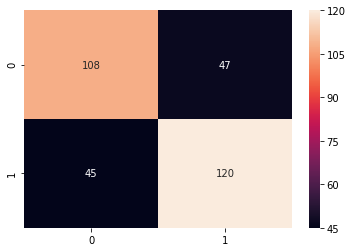

In [38]:
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='2.0f')

In [39]:
print(f"Accuracy is {accuracy_score(Y_test, y_pred)}")

Accuracy is 0.7125


### Reference:
Data analysis with pandas [link](https://www.packtpub.com/big-data-and-business-intelligence/hands-data-analysis-pandas) <br>
Machine Learning Pocket Reference [link](https://www.amazon.com/Machine-Learning-Pocket-Reference-Structured/dp/1492047546) <br>
Ensemble Machine Learning Cookbook [link](https://www.amazon.com/Ensemble-Machine-Learning-Cookbook-techniques/dp/1789136601)<br>
Hands-On Artificial Intelligence for IoT 
